#STARTING

# Importing the numpy and the pandas and the encoder

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [105]:
# import my drive to could enter to the files in it

# Importing my drive

In [106]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# giving my CSV file 'path' name

In [108]:
path = "/content/drive/MyDrive/Data Science/WSNBFSFdataset_DSprog.csv"

In [109]:
# df data set read my file by pandas

In [110]:
df = pd.read_csv(path)

In [111]:
# to know the shape (number of rows and columns) for my data set

In [112]:
df.shape

(50000, 19)

# see if there are null values

In [113]:
# to see if there are null values in the set to work with the missing values

In [114]:
df.isnull().sum()

Event                0
Time              1698
S_Node               0
Node_id              0
Rest_Energy       1710
Trace_Level       3898
Mac_Type_Pckt     1778
Source_IP_Port       0
Des_IP_Port         60
Packet_Size        939
TTL                  0
Hop_Count            0
Broadcast_ID         0
Dest_Node_Num      419
Dest_Seq_Num      1235
Src_Node_ID          0
Src_Seq_Num          0
behaviour            0
Type                 0
dtype: int64

#So we have null elements like :
                              1. Time
                              2. Rest_Energy
                              3. Trace_Level       
                              4. Mac_Type_Pckt
                              5. Dec_IP_Port
                              6. Packet_Size
                              7. Dest_Node_Num
                              8. Dest_Seq_Num





# Working With The Missing Value

In [115]:
# Filling the null values with the value 0
#df_zero = df.fillna(value = 0)
#df_zero

In [116]:
# Filling null values with a previous value

#df_prev = df.fillna(method = 'pad')

In [117]:
df['Mac_Type_Pckt'] = df['Mac_Type_Pckt'].fillna(method = 'pad')
df['Dest_Node_Num'] = df['Dest_Node_Num'].fillna(method = 'pad')
df['Packet_Size'] = df['Packet_Size'].fillna(method = 'pad')
df['Trace_Level'] = df['Trace_Level'].fillna(method = 'pad')
df['Des_IP_Port'] = df['Des_IP_Port'].fillna(method = 'pad')
df['Dest_Seq_Num'] = df['Dest_Seq_Num'].fillna(value = 0)

In [118]:
#df_prev.isnull().sum().sum()

In [119]:
# Filling different values in deffrent columns
#df_diff = df.fillna({'Time': '73.145837'})

In [120]:
# filling the null values with the mean of the value in a data set
df = df.fillna(value = df['Time'].mean())
df = df.fillna(value = df['Rest_Energy'].mean())


# See if there a common between the columns + drop useful columns

In [121]:
# Using the corr function to see if there a common between the columns

In [122]:
df.corr()


<ipython-input-122-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
Event,1.000000,-0.024723,-0.003659,-0.003659,-0.008229,NaN,0.014488,-0.004034,NaN,0.744610,-0.005996,0.005820,-0.019701,-0.017337,0.003888,-0.025867,-0.019701
Time,-0.024723,1.000000,-0.030921,-0.030921,-0.052158,NaN,0.000920,-0.034001,NaN,-0.037319,0.095411,-0.069967,0.623493,-0.013688,-0.207641,0.243795,0.623493
S_Node,-0.003659,-0.030921,1.000000,1.000000,-0.004519,NaN,0.003037,0.867793,NaN,-0.003946,-0.010985,0.056675,-0.004429,0.002242,-0.004356,0.020096,-0.004429
Node_id,-0.003659,-0.030921,1.000000,1.000000,-0.004519,NaN,0.003037,0.867793,NaN,-0.003946,-0.010985,0.056675,-0.004429,0.002242,-0.004356,0.020096,-0.004429
Rest_Energy,-0.008229,-0.052158,-0.004519,-0.004519,1.000000,NaN,-0.001735,-0.002532,NaN,-0.008080,-0.029921,-0.011934,-0.022582,-0.007505,0.023700,-0.022850,-0.022582
Trace_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mac_Type_Pckt,0.014488,0.000920,0.003037,0.003037,-0.001735,NaN,1.000000,0.003096,NaN,0.004112,-0.010152,0.016574,0.002436,0.007805,-0.002812,0.004383,0.002436
Source_IP_Port,-0.004034,-0.034001,0.867793,0.867793,-0.002532,NaN,0.003096,1.000000,NaN,-0.004491,-0.010838,0.050432,-0.005476,0.000874,-0.003176,0.020466,-0.005476
Des_IP_Port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet_Size,0.744610,-0.037319,-0.003946,-0.003946,-0.008080,NaN,0.004112,-0.004491,NaN,1.000000,0.009368,-0.001350,-0.022969,-0.025186,-0.007175,-0.039083,-0.022969


In [123]:
# Drop the columns

In [124]:
df = df.drop(columns=['Node_id'])
df = df.drop(columns=['Broadcast_ID'])

#Changing the data type by One Hot Encoder & Label Encoder

In [125]:
# Changing the data type of the ("type","behaviour") from OBJECT into INTEGER by using the OHe and Le --> One Hot Encoder & Label Encoder

In [126]:
cat_columns = df.select_dtypes(['object']).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)
df

,Event,Time,S_Node,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,73.145496,62,45.015145,5.0,800.0,67.255,1.255,48.0,27,4,37.0,0.0,18,6,1,0
49996,2,73.145496,110,45.015145,5.0,800.0,67.255,1.255,48.0,27,4,37.0,0.0,18,6,1,1
49997,1,45.015145,47,45.015145,5.0,800.0,47.255,1.255,48.0,27,4,37.0,0.0,18,6,1,1
49998,4,73.145837,136,45.015145,5.0,800.0,137.255,1.255,106.0,27,4,37.0,0.0,18,6,1,1


# Sipllting the data set into two types       1) Train       2) Test

In [127]:
# Sipllting the data set into two types       1) Train       2) Test

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X = df.drop('behaviour' , axis=1)
y = df['behaviour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# 1) Random Forest Classifier Model

In [130]:
# using the model for machine learning and first I'm going to use the Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [132]:
clf = RandomForestClassifier(random_state=0)

In [133]:
clf.fit(X_train, y_train)
y_pred_random = clf.predict(X_test)

In [134]:
random_accuracy = accuracy_score(y_test, y_pred_random)
print("Accuracy:", random_accuracy)

Accuracy: 1.0


#2) K Neighbors Classifier (KNN) Model

In [135]:
# importing KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train , y_train)
y_pred_KNN = classifier.predict(X_test)

In [136]:
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", KNN_accuracy)

Accuracy: 0.9792


#3) Decision Tree Classifier Model

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
y_pred_tree = clf.predict(X_test)

In [139]:
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 1.0


#Virtualization for the elements in the Data set

In [140]:
df

,Event,Time,S_Node,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,100.0,0.0,79,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,73.145496,62,45.015145,5.0,800.0,67.255,1.255,48.0,27,4,37.0,0.0,18,6,1,0
49996,2,73.145496,110,45.015145,5.0,800.0,67.255,1.255,48.0,27,4,37.0,0.0,18,6,1,1
49997,1,45.015145,47,45.015145,5.0,800.0,47.255,1.255,48.0,27,4,37.0,0.0,18,6,1,1
49998,4,73.145837,136,45.015145,5.0,800.0,137.255,1.255,106.0,27,4,37.0,0.0,18,6,1,1


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

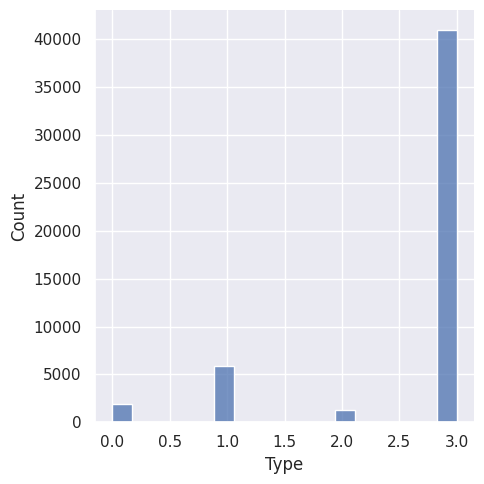

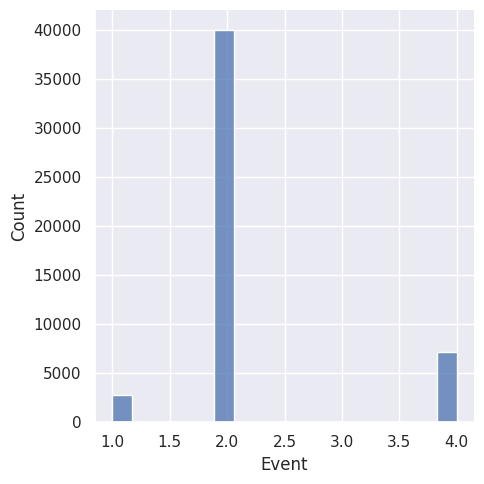

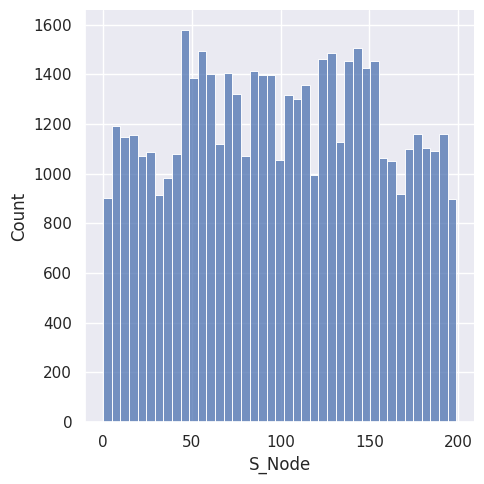

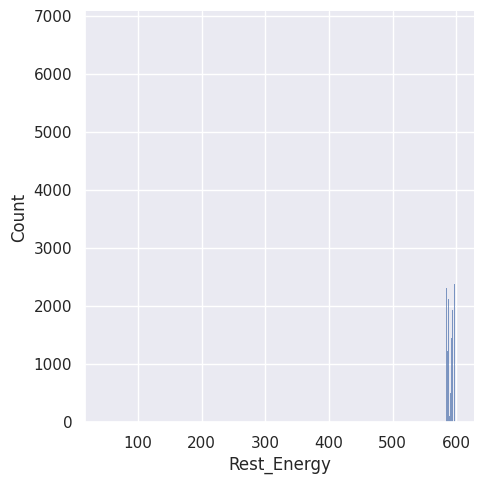

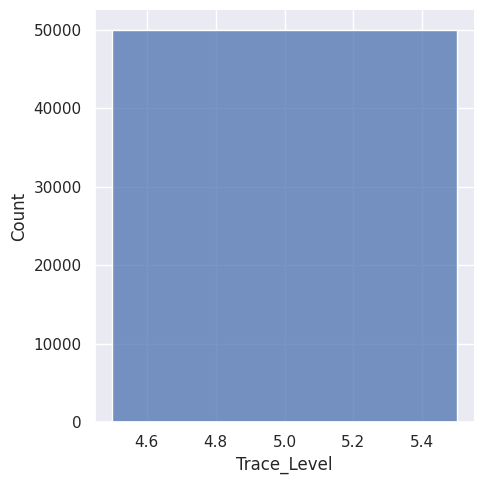

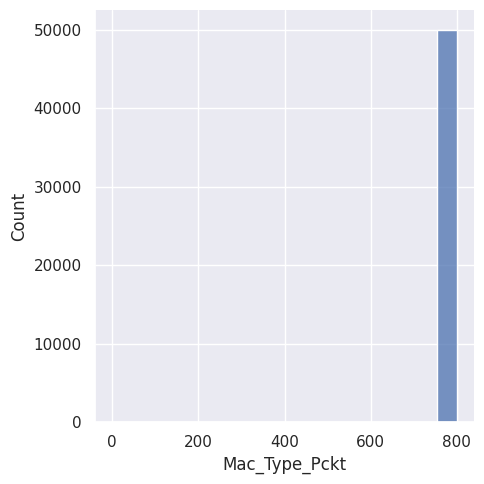

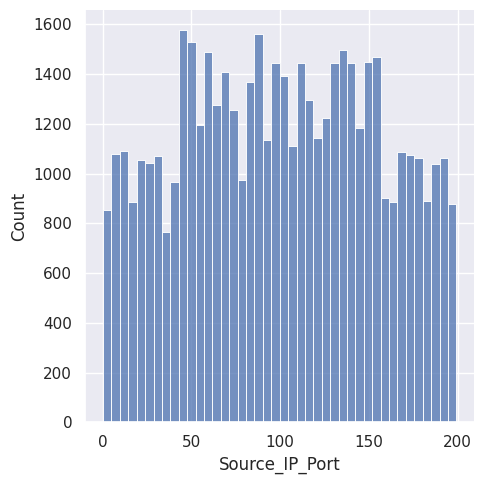

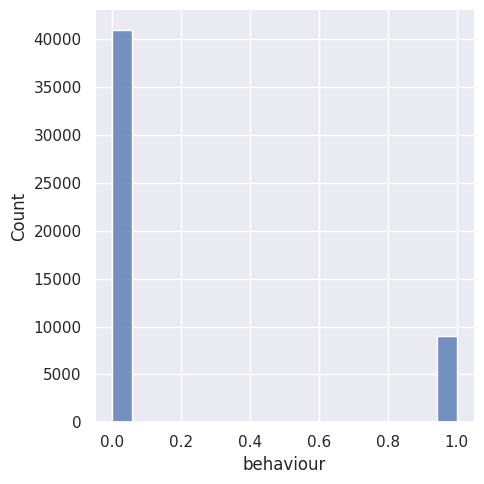

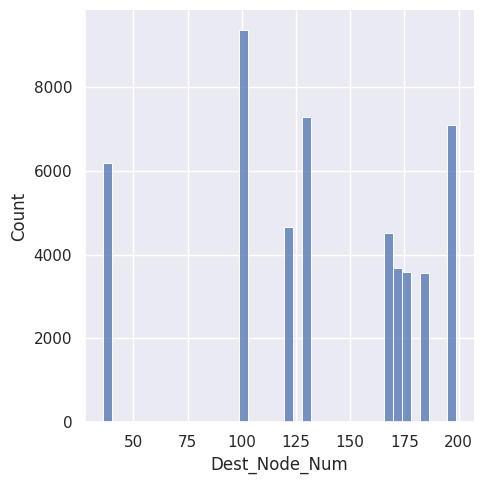

In [142]:
sns.displot(df['Type'])
sns.displot(df['Event'])
sns.displot(df['S_Node'])
sns.displot(df['Rest_Energy'])
sns.displot(df['Trace_Level'])
sns.displot(df['Mac_Type_Pckt'])
sns.displot(df['Source_IP_Port'])
sns.displot(df['behaviour'])
sns.displot(df['Dest_Node_Num'])

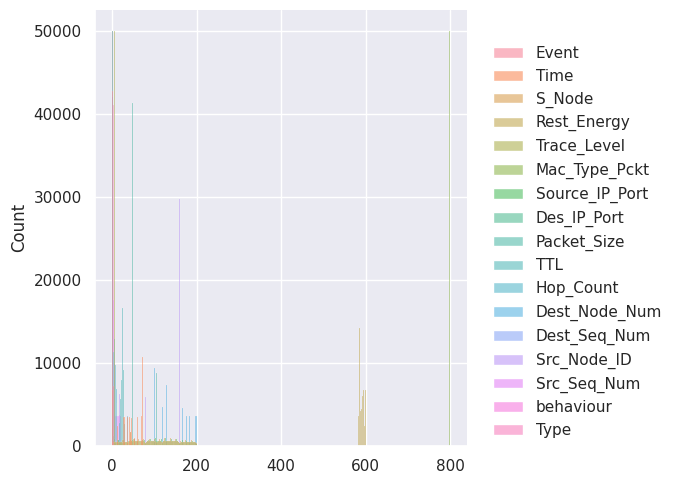

In [143]:
sns.displot(df)

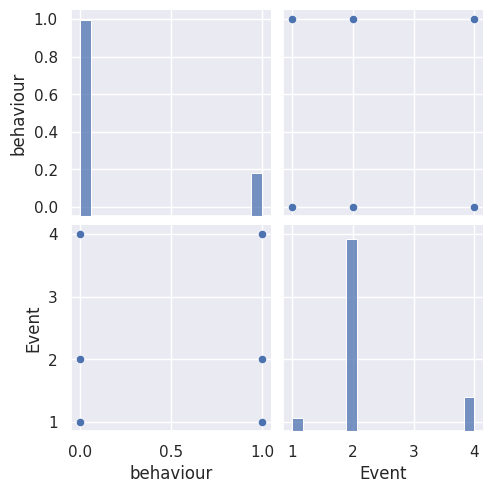

In [144]:
sns.pairplot(df[['behaviour', 'Event']])